# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
# import sys
import warnings
# if not sys.warnoptions:
#     warnings.simplefilter("ignore")
from scipy.stats import kruskal
from geopy.geocoders import Nominatim

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Business Understanding

# Load Dataset

In [ ]:
# Load Dataset Hasil Bumi
df_file = ('Buah-buahan',
           'Daging Telur Susu Unggas',
           'Daging Ternak',
           'Perikanan Budidaya',
           'Perikanan Tangkap Laut',
           'Perikanan Tangkap Perairan Umum',
           'Perkebunan',
           'Tanaman Biofarmaka',
           'Tanaman Pangan',
           'Tanaman Sayuran')

files = dict()
for i in df_file:
  df = pd.read_excel('/content/drive/MyDrive/SKRIPSI CLUST UMKM/Skripsi/'+ (i) + '.xlsx')
  files [i] = df

# Load Dataset UMKM
umkm = pd.read_excel('/content/drive/MyDrive/SKRIPSI CLUST UMKM/Jumlah UMKM Jawa Timur 2022 SKRIPSI.xlsx')

#Load Dataset PDRB ADHB
pdrb = pd.read_excel('/content/drive/MyDrive/SKRIPSI CLUST UMKM/PDRB ADHB 3 sektor.xlsx')

In [ ]:
files.keys()

dict_keys(['Buah-buahan', 'Daging Telur Susu Unggas', 'Daging Ternak', 'Perikanan Budidaya', 'Perikanan Tangkap Laut', 'Perikanan Tangkap Perairan Umum', 'Perkebunan', 'Tanaman Biofarmaka', 'Tanaman Pangan', 'Tanaman Sayuran'])

# Data Preparation

## Data Cleansing

### Handling Missing Values

In [ ]:
for i in files:
  print(files[i][files[i].isnull().any(axis=1)])

   nama_kabupaten_kota  alpukat  anggur  apel  belimbing  duku  durian  \
21          Bojonegoro      996       0     0      19681   NaN     299   

     jambu  jengkol  jeruk  ...   sawo  sirsak  sukun  buah_baga  lemon  \
21  441049        0   1743  ...  12072    6949   3275         18      0   

    lengkeng  semangka  stroberi  melon   satuan  
21      2053     33480         0  10770  quintal  

[1 rows x 30 columns]
Empty DataFrame
Columns: [nama_kabupaten_kota, ayam_kampung, ayam_petelur, itik_bebek, telur_ayam, telur_itik_bebek, susu_sapi, satuan]
Index: []
Empty DataFrame
Columns: [nama_kabupaten_kota, sapi, kerbau, kuda, kambing, domba, babi, satuan]
Index: []
Empty DataFrame
Columns: [nama_kabupaten_kota, patin, lele, nila, ikan_mas, kakap, bandeng, kerapu, udang_budidaya, ikan_lainnya, satuan]
Index: []
Empty DataFrame
Columns: [nama_kabupaten_kota, cakalang, tongkol, tuna, udang_laut, lainnya, satuan]
Index: []
Empty DataFrame
Columns: [nama_kabupaten_kota, udang_perairan, 

In [ ]:
files['Buah-buahan']['duku'].fillna(0, inplace=True)

In [ ]:
files['Daging Telur Susu Unggas']['susu_sapi'].replace(14103027788.00, 141030277.88, inplace=True)

### Change Data Type

In [ ]:
for i in files:
  files[i].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nama_kabupaten_kota  38 non-null     object 
 1   alpukat              38 non-null     int64  
 2   anggur               38 non-null     int64  
 3   apel                 38 non-null     int64  
 4   belimbing            38 non-null     int64  
 5   duku                 38 non-null     float64
 6   durian               38 non-null     int64  
 7   jambu                38 non-null     int64  
 8   jengkol              38 non-null     int64  
 9   jeruk                38 non-null     int64  
 10  mangga               38 non-null     int64  
 11  manggis              38 non-null     int64  
 12  melinjo              38 non-null     int64  
 13  nangka               38 non-null     int64  
 14  nanas                38 non-null     int64  
 15  pepaya               38 non-null     int64

In [ ]:
files['Buah-buahan']['duku'] = files['Buah-buahan']['duku'].astype(int)

## Feature Engineering

### Equalize Units

In [ ]:
judul = files.keys()
a =[]
for i in judul:
    a.append([i, files[i]['satuan'].unique()])

dfDesc = pd.DataFrame(columns=['data','unique'],
                     data=a)
dfDesc

,data,unique
0,Buah-buahan,[quintal]
1,Daging Telur Susu Unggas,[kilogram]
2,Daging Ternak,[kilogram]
3,Perikanan Budidaya,[ton]
4,Perikanan Tangkap Laut,[ton]
5,Perikanan Tangkap Perairan Umum,[ton]
6,Perkebunan,[ton]
7,Tanaman Biofarmaka,[kilogram]
8,Tanaman Pangan,[ton]
9,Tanaman Sayuran,[quintal]


In [ ]:
files['Buah-buahan'].iloc[:, 1:-1] * 1/10

,alpukat,anggur,apel,belimbing,duku,durian,jambu,jengkol,jeruk,mangga,...,salak,sawo,sirsak,sukun,buah_baga,lemon,lengkeng,semangka,stroberi,melon
0,1708.7,0.0,0.0,208.6,215.4,2658.8,1626.3,0.0,4656.1,2914.4,...,2491.6,261.2,197.6,1137.6,121.1,8.4,164.1,200.3,0.0,1.6
1,8445.2,0.0,0.0,1308.7,97.3,17248.5,2343.8,0.0,17118.7,55251.6,...,295.8,711.8,334.7,29.4,14.3,480.4,23.9,57.5,2.4,3682.6
2,6008.3,5.5,0.0,776.5,69.9,10115.2,1079.9,750.9,117.1,3707.7,...,1604.4,178.5,174.1,520.0,114.3,5.9,16.4,178.1,1.0,179.6
3,3181.7,0.5,0.0,11897.1,202.4,2195.3,2029.0,0.1,32129.7,19403.8,...,242.4,365.5,350.3,1250.9,23.7,15.2,138.9,1046.9,0.0,1097.3
4,13782.4,0.5,0.0,9803.7,4145.1,14356.2,3392.1,0.0,8211.5,5395.1,...,3367.3,524.9,1801.8,462.6,192.4,59.6,4.5,886.0,0.0,1120.7
5,12849.2,1.6,0.0,2641.1,0.5,13385.8,4155.2,13.7,11775.4,135101.4,...,43.7,2174.4,7329.1,1978.8,55.5,401.9,856.7,3004.0,0.1,352.0
6,44143.0,3.7,198994.3,9466.3,2783.0,57491.0,6176.3,56.3,328875.8,12102.7,...,92513.9,489.6,7772.5,5764.2,5230.6,543.1,946.5,278.8,113.2,672.8
7,2790.8,0.0,0.0,623.1,80.5,1763.8,886.5,0.8,11165.1,3703.0,...,32054.5,152.7,344.3,245.7,36.3,0.0,112.0,9234.0,0.0,669.0
8,8256.2,72.0,0.0,1774.1,8021.8,35301.1,14052.0,1.4,308405.0,23749.2,...,39401.6,1352.8,1959.8,2801.8,2010.3,271.9,2235.2,29192.4,773.2,675.2
9,685.2,55.6,0.0,822.5,477.8,5339.9,14649.7,103.4,380951.4,38278.3,...,520.3,250.4,430.7,682.7,272324.7,83.9,560.5,24306.4,0.0,5585.7


In [ ]:
# Mengubah Satuan Buah-Buahan Menjadi Ton
files['Buah-buahan'] = files['Buah-buahan'].iloc[:, 1:-1] * 1/10

# Mengubah Satuan Daging Telur Susu Unggas Menjadi Ton
files['Daging Telur Susu Unggas'] = files['Daging Telur Susu Unggas'].iloc[:, 1:-1] * 1/100

# Mengubah Satuan Daging Ternak Menjadi Ton
files['Daging Ternak'] = files['Daging Ternak'].iloc[:, 1:-1] * 1/100

# Mengubah Satuan Tanaman Biofarmaka Menjadi Ton
files['Tanaman Biofarmaka'] = files['Tanaman Biofarmaka'].iloc[:, 1:-1] * 1/100

# Mengubah Satuan Tanaman Sayuran Menjadi Ton
files['Tanaman Sayuran'] = files['Tanaman Sayuran'].iloc[:, 1:-1] * 1/10

In [ ]:
files['Perikanan Budidaya'] = files['Perikanan Budidaya'].iloc[:, 1:-1]
files['Perikanan Tangkap Laut'] = files['Perikanan Tangkap Laut'].iloc[:, 1:-1]
files['Perikanan Tangkap Perairan Umum'] = files['Perikanan Tangkap Perairan Umum'].iloc[:, 1:-1]
files['Perkebunan'] = files['Perkebunan'].iloc[:, 1:-1]
files['Tanaman Pangan'] = files['Tanaman Pangan'].iloc[:, 1:-1]

### Merging Dataset Hasil Bumi + Jumlah UMKM + PRDB

In [ ]:
# Penggabungan data UMKM dengan Hasil Bumi dan PRDB
judul = files.keys()
for i in judul:
  umkm = pd.concat([umkm, files[i]], axis=1)

umkm = umkm.merge(pdrb, how='left', on =['nama_kabupaten_kota'])
umkm = umkm.drop(columns=['satuan'])

umkm

,nama_kabupaten_kota,pertanian_kehutanan_perikanan,industri_pengolahan,akomodasi_makan_minum,alpukat,anggur,apel,belimbing,duku,durian,...,ketimun,kubis,labu_siam,paprika,sawi,terong,tomat,wortel,jamur,PDRB_ADHB
0,Pacitan,134543,28836,6970,1708.7,0.0,0.0,208.6,215.4,2658.8,...,500.0,7.5,229.2,0.0,110.3,494.2,143.6,0.0,933.6,6662.80418
1,Ponorogo,185737,20241,15167,8445.2,0.0,0.0,1308.7,97.3,17248.5,...,92.9,3586.5,0.0,0.0,891.9,135.9,250.1,7560.6,4.5,8664.22590
2,Trenggalek,152485,31574,7799,6008.3,5.5,0.0,776.5,69.9,10115.2,...,738.7,0.9,602.2,0.0,497.9,508.6,597.0,0.0,1202.5,9697.75493
3,Tulungagung,154575,40584,19062,3181.7,0.5,0.0,11897.1,202.4,2195.3,...,298.0,3676.3,213.8,0.0,2204.9,252.4,316.7,163.5,846.0,19481.62800
4,Blitar,231704,28126,17223,13782.4,0.5,0.0,9803.7,4145.1,14356.2,...,3537.3,2082.2,0.0,0.0,825.1,4000.8,4302.0,500.0,312.0,19370.05530
5,Kediri,204487,22947,33654,12849.2,1.6,0.0,2641.1,0.5,13385.8,...,9224.0,80.0,0.0,0.0,4964.5,9734.3,9397.9,0.0,3142.2,21466.92443
6,Malang,341395,40437,38764,44143.0,3.7,198994.3,9466.3,2783.0,57491.0,...,21054.6,90863.4,21450.5,0.0,37036.3,50276.4,45419.2,25693.8,4540.1,59551.89594
7,Lumajang,169620,16860,17678,2790.8,0.0,0.0,623.1,80.5,1763.8,...,3315.3,11636.2,0.0,0.0,4591.5,3540.3,3327.8,4972.0,144.4,20789.18575
8,Jember,365192,36538,42506,8256.2,72.0,0.0,1774.1,8021.8,35301.1,...,1370.8,3383.4,365.7,148.7,640.2,4798.4,1322.4,0.0,3426.2,43916.64033
9,Banyuwangi,238739,44665,30986,685.2,55.6,0.0,822.5,477.8,5339.9,...,2564.1,340.8,164.0,0.0,1012.1,3198.7,3153.9,0.0,2910.8,40462.35000


In [ ]:
umkm.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 37
Data columns (total 102 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    nama_kabupaten_kota            38 non-null     object 
 1    pertanian_kehutanan_perikanan  38 non-null     int64  
 2    industri_pengolahan            38 non-null     int64  
 3    akomodasi_makan_minum          38 non-null     int64  
 4    alpukat                        38 non-null     float64
 5    anggur                         38 non-null     float64
 6    apel                           38 non-null     float64
 7    belimbing                      38 non-null     float64
 8    duku                           38 non-null     float64
 9    durian                         38 non-null     float64
 10   jambu                          38 non-null     float64
 11   jengkol                        38 non-null     float64
 12   jeruk                          38 no

### UMKM Dataset dengan total hasil bumi per-kategori

In [ ]:
umkm_total = umkm.copy()

umkm_total['buah-buahan'] = umkm_total.iloc[:, 4:32].sum(axis=1)
umkm_total['daging unggas'] = umkm_total.iloc[:, 32:35].sum(axis=1)
umkm_total['telur unggas'] = umkm_total.iloc[:, 35:37].sum(axis=1)
umkm_total['susu sapi'] = umkm_total.iloc[:, 37:38].sum(axis=1)
umkm_total['daging ternak'] = umkm_total.iloc[:, 38:44].sum(axis=1)
umkm_total['perikanan budidaya'] = umkm_total.iloc[:, 44:53].sum(axis=1)
umkm_total['perikanan laut'] = umkm_total.iloc[:, 53:58].sum(axis=1)
umkm_total['perikanan air umum'] = umkm_total.iloc[:, 58:60].sum(axis=1)
umkm_total['perkebunan'] = umkm_total.iloc[:, 60:67].sum(axis=1)
umkm_total['tanaman biofarmaka'] = umkm_total.iloc[:, 67:80].sum(axis=1)
umkm_total['tanaman pangan'] = umkm_total.iloc[:, 80:82].sum(axis=1)
umkm_total['tanaman sayuran'] = umkm_total.iloc[:, 82:101].sum(axis=1)


umkm_total = umkm_total.drop(columns=umkm_total.iloc[:, 4:101])
umkm_total = umkm_total.round(decimals=1)

# umkm_total['buah-buahan'] = umkm_total.iloc[:, 4:32].sum(axis=1)
# umkm_total['daging unggas'] = umkm_total.iloc[:, 32:35].sum(axis=1)
# umkm_total['telur unggas'] = umkm_total.iloc[:, 35:37].sum(axis=1)
# umkm_total['susu sapi'] = umkm_total.iloc[:, 37:38].sum(axis=1)
# umkm_total['daging ternak'] = umkm_total.iloc[:, 38:44].sum(axis=1)
# umkm_total['perikanan budidaya'] = umkm_total.iloc[:, 44:53].sum(axis=1)
# umkm_total['perikanan laut'] = umkm_total.iloc[:, 53:58].sum(axis=1)
# umkm_total['perikanan air umum'] = umkm_total.iloc[:, 58:60].sum(axis=1)
# umkm_total['perkebunan'] = umkm_total.iloc[:, 60:67].sum(axis=1)
# umkm_total['tanaman biofarmaka'] = umkm_total.iloc[:, 67:80].sum(axis=1)
# umkm_total['tanaman pangan'] = umkm_total.iloc[:, 80:82].sum(axis=1)
# umkm_total['tanaman sayuran'] = umkm_total.iloc[:, 82:101].sum(axis=1)


In [ ]:
umkm_total

,nama_kabupaten_kota,pertanian_kehutanan_perikanan,industri_pengolahan,akomodasi_makan_minum,PDRB_ADHB,buah-buahan,daging unggas,telur unggas,susu sapi,daging ternak,perikanan budidaya,perikanan laut,perikanan air umum,perkebunan,tanaman biofarmaka,tanaman pangan,tanaman sayuran
0,Pacitan,134543,28836,6970,6662.8,63824.8,17060.1,6332.1,15950.9,23914.7,1757,15634,471,29510,427600.3,143474.6,6690.8
1,Ponorogo,185737,20241,15167,8664.2,206633.6,12556.1,10283.8,111320.3,15914.6,1901,0,50,6215,59687.5,584331.8,24660.7
2,Trenggalek,152485,31574,7799,9697.8,70119.5,14681.7,26235.7,130995.0,15265.6,4652,22199,22,39667,54281.5,185105.0,7966.6
3,Tulungagung,154575,40584,19062,19481.6,142451.3,45945.3,65626.5,508981.4,163939.1,36152,10272,21,71968,12936.7,349614.7,13685.1
4,Blitar,231704,28126,17223,19370.1,204292.7,46663.5,123365.1,395836.1,29179.3,17830,2013,269,228636,13641.8,343194.5,76977.2
5,Kediri,204487,22947,33654,21466.9,561862.8,38835.7,30307.3,216406.8,43915.6,22361,0,119,275236,254920.8,272065.4,150208.9
6,Malang,341395,40437,38764,59551.9,2129371.8,56957.7,57102.4,1726111.1,59242.3,11594,16011,492,158392,115001.6,447822.1,548734.9
7,Lumajang,169620,16860,17678,20789.2,191411.6,28767.9,36342.4,147872.7,35328.1,3455,5656,715,51420,63176.9,478697.5,73079.5
8,Jember,365192,36538,42506,43916.6,718934.0,92938.3,26995.3,30683.0,25984.1,13376,15780,184,116391,21679.6,967333.0,49211.7
9,Banyuwangi,238739,44665,30986,40462.4,1024874.8,17563.3,30263.6,16060.4,44068.9,24524,53619,2079,104644,14441.2,729690.6,138222.0


# Modelling

In [ ]:
umkm_total.iloc[:,0]

0              Pacitan
1             Ponorogo
2           Trenggalek
3          Tulungagung
4               Blitar
5               Kediri
6               Malang
7             Lumajang
8               Jember
9           Banyuwangi
10           Bondowoso
11           Situbondo
12         Probolinggo
13            Pasuruan
14            Sidoarjo
15           Mojokerto
16             Jombang
17             Nganjuk
18              Madiun
19             Magetan
20               Ngawi
21          Bojonegoro
22               Tuban
23            Lamongan
24              Gresik
25           Bangkalan
26             Sampang
27           Pamekasan
28             Sumenep
29         Kota Kediri
30         Kota Blitar
31         Kota Malang
32    Kota Probolinggo
33       Kota Pasuruan
34      Kota Mojokerto
35         Kota Madiun
36       Kota Surabaya
37           Kota Batu
Name: nama_kabupaten_kota, dtype: object

In [ ]:
umkm_total.columns[1:len(umkm_total.columns)]

Index(['pertanian_kehutanan_perikanan', 'industri_pengolahan',
       'akomodasi_makan_minum', 'PDRB_ADHB', 'buah-buahan', 'daging unggas',
       'telur unggas', 'susu sapi', 'daging ternak', 'perikanan budidaya',
       'perikanan laut', 'perikanan air umum', 'perkebunan',
       'tanaman biofarmaka', 'tanaman pangan', 'tanaman sayuran',
       'hasil bumi'],
      dtype='object')

## Data Scalling

### B. Robust Scaler

In [ ]:
# Data Train dengan robust scaler
rs=RobustScaler()
modelrs=rs.fit_transform(umkm_total.iloc[:,1:len(umkm_total.columns)])
train_rs=pd.DataFrame(index=umkm_total.iloc[:,0],data=modelrs)
train_rs.columns=umkm_total.columns[1:len(umkm_total.columns)]

## Select Number of Clusters

### 1B. K-Means + Robust Scaller

RobustScaler digunakan karena pada dataset memiliki outlier dan bertujuan untuk menghindari hasil klusterisasi yang bias diakibatkan oleh outlier. RobustScaler menggunakan interquartile range yang akan menghapus median untuk melakukan skala data berdasarkan quantil range.

#### Tanpa Dimension Reduction

In [ ]:
# Silhouette score

sill2=[]
for k in range(3, 6):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(train_rs)
    pred = model.predict(train_rs)
    score = silhouette_score(train_rs, pred)
    sill2.append([score, k])
    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 3: 0.478


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 4: 0.353


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 5: 0.386


Dapat dilihat dari grafik silhouette score, tertinggi dengan nilai 0,502 dengan jumlah kluster sebanyak 3. Silhouette score dengan menggunakan RobustScaler lebih besar dibandingkan MinMaxScaler hal tersebut disebabkan oleh RobustScaler tidak sensitif dengan outlier.

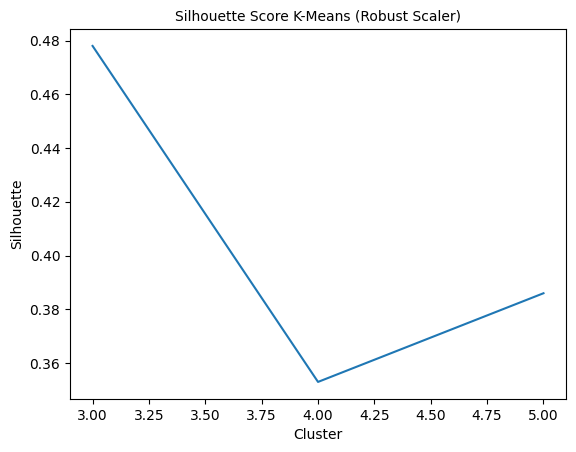

In [ ]:
# Cek Silhouette Score
x=[x for x,y in sill2]
y=[y for x,y in sill2]
ax = sns.lineplot(x=y,y=x)
ax.set_title('Silhouette Score K-Means (Robust Scaler)',size=10)
ax.set_xlabel( "Cluster")
ax.set_ylabel( "Silhouette")
plt.show()

#### Using Dimension Reduction

In [ ]:
# Pemilihan jumlah komponen untuk PCA
x = train_rs.values
pca = PCA()
pca.fit(x)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
n_components = np.argmax(cumulative_variance_ratio >= 0.9) + 1

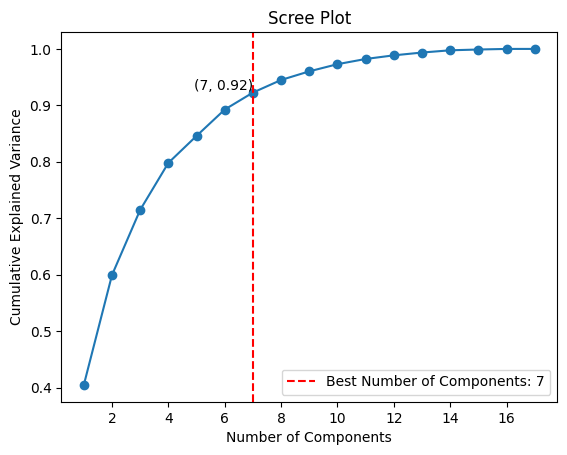

In [ ]:
# Plot the scree plot with the best number of components line
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.axvline(x=n_components, color='r', linestyle='--', label=f'Best Number of Components: {n_components}')
plt.text(n_components, cumulative_variance_ratio[n_components-1], f'({n_components}, {cumulative_variance_ratio[n_components-1]:.2f})',
         verticalalignment='bottom', horizontalalignment='right')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.legend()
plt.show()

In [ ]:
# Menggunakan PCA
pca=PCA(n_components=7)
x=train_rs.values
temp=pca.fit_transform(x)
sill_km_rs_pca=[]
for k in range(3, 6):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(temp)
    pred = model.predict(temp)
    score = silhouette_score(temp, pred)
    sill_km_rs_pca.append([score, k])
    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))


Silhouette Score for k = 3: 0.521
Silhouette Score for k = 4: 0.410
Silhouette Score for k = 5: 0.389


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Menggunakan pca
pca=PCA(n_components=7)
x=train_rs.values
temp=pca.fit_transform(x)
model_km_rs=KMeans(n_clusters=3,random_state=42).fit(temp)

print(metrics.silhouette_score(temp, model_km_rs.labels_))

0.5205490828031545


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


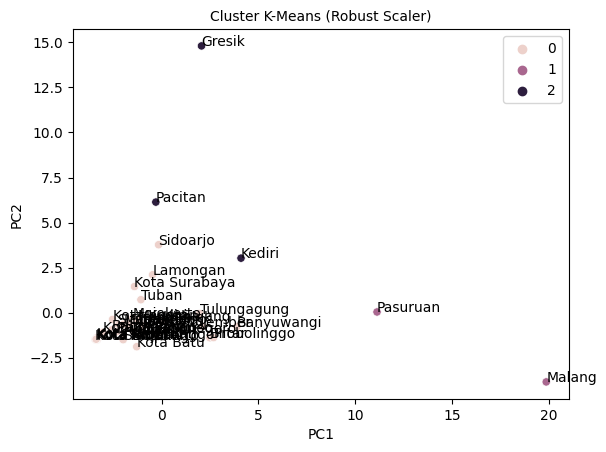

In [ ]:
# Scatterplot
ax = sns.scatterplot(x=temp[:,0],y=temp[:,1],hue=model_km_rs.labels_)
[plt.text(x=temp[i,0],y=temp[i,1],s=umkm_total.iloc[i,0]) for i in range(0,umkm_total.shape[0])]
ax.set_title('Cluster K-Means (Robust Scaler)',size=10)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()

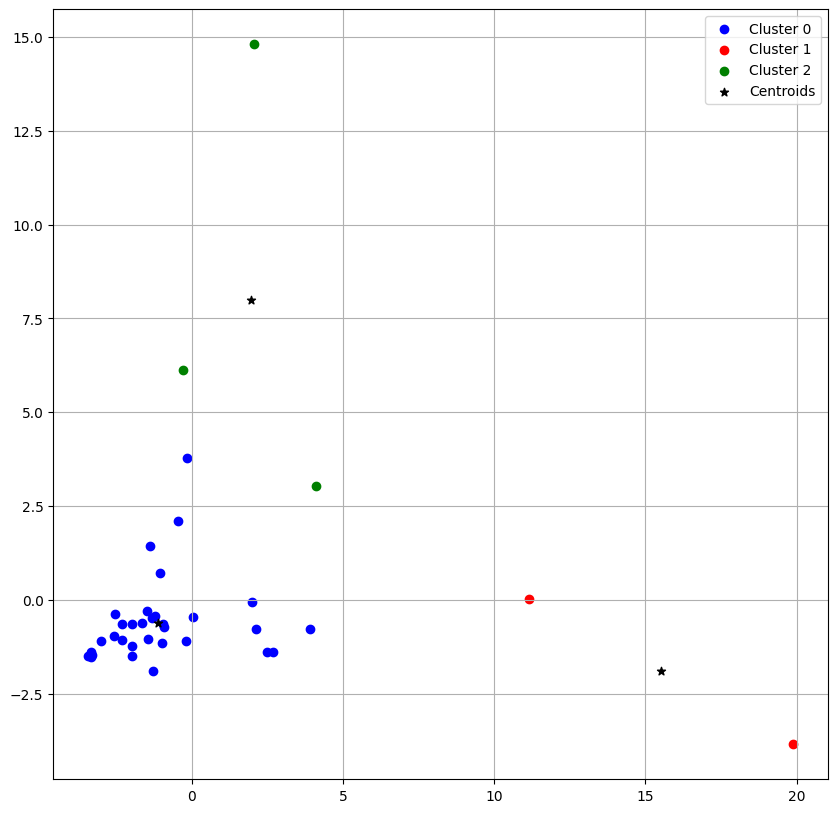

In [ ]:
plt.figure(figsize=(10,10))

plt.scatter(temp[model_km_rs.labels_ == 0, 0], temp[model_km_rs.labels_ == 0, 1],
            c='blue', label='Cluster 0')

plt.scatter(temp[model_km_rs.labels_ == 1, 0], temp[model_km_rs.labels_ == 1, 1],
            c='red', label='Cluster 1')

plt.scatter(temp[model_km_rs.labels_ == 2, 0], temp[model_km_rs.labels_ == 2, 1],
            c='green', label='Cluster 2')

# plot centroid

plt.scatter(model_km_rs.cluster_centers_[:, 0], model_km_rs.cluster_centers_[:, 1],
            marker='*', c='black', label='Centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

### 2B. Agglomerative + Robust Scaller

#### Tanpa Dimension Reduction

In [ ]:
# Silhouette score

sill5=[]
for k in range(3, 6):
    model=AgglomerativeClustering(n_clusters=k,linkage='average')
    model.fit(train_rs)
    labels = model.fit(train_rs).labels_
    score = silhouette_score(train_rs, labels)
    sill5.append([score, k])
    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))

Silhouette Score for k = 3: 0.568
Silhouette Score for k = 4: 0.500
Silhouette Score for k = 5: 0.405


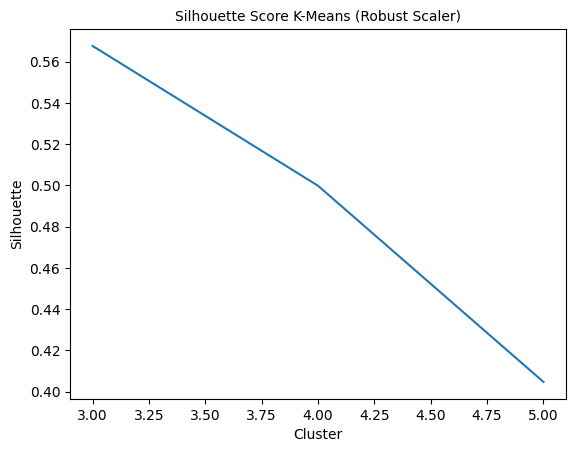

In [ ]:
# Cek Silhouette Score
x=[x for x,y in sill5]
y=[y for x,y in sill5]
ax = sns.lineplot(x=y,y=x)
ax.set_title('Silhouette Score K-Means (Robust Scaler)',size=10)
ax.set_xlabel( "Cluster")
ax.set_ylabel( "Silhouette")
plt.show()

#### Using Dimension Reduction

In [ ]:
# Pemilihan jumlah komponen untuk PCA
x = train_rs.values
pca = PCA()
pca.fit(x)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
n_components = np.argmax(cumulative_variance_ratio >= 0.9) + 1

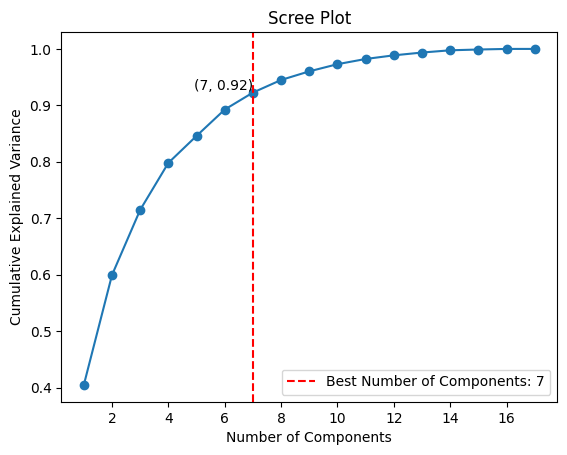

In [ ]:
# Plot the scree plot with the best number of components line
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.axvline(x=n_components, color='r', linestyle='--', label=f'Best Number of Components: {n_components}')
plt.text(n_components, cumulative_variance_ratio[n_components-1], f'({n_components}, {cumulative_variance_ratio[n_components-1]:.2f})',
         verticalalignment='bottom', horizontalalignment='right')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.legend()
plt.show()

In [ ]:
# Menggunakan PCA
pca=PCA(n_components=7)
x=train_rs.values
temp=pca.fit_transform(x)
sill_ag_rs_pca=[]

for k in range(3,6):
    model=AgglomerativeClustering(n_clusters=k,linkage='average')
    model.fit(temp)
    labels=model.fit(temp).labels_
    score = silhouette_score(temp, labels)
    sill_ag_rs_pca.append([score, k])
    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))

Silhouette Score for k = 3: 0.604
Silhouette Score for k = 4: 0.472
Silhouette Score for k = 5: 0.450


In [ ]:
# Menggunakan pca
pca=PCA(n_components=7)
x=train_rs.values
temp=pca.fit_transform(x)
model_ag_rs_pca=AgglomerativeClustering(n_clusters=3,linkage='average').fit(temp)

print(metrics.silhouette_score(temp, model_ag_rs_pca.labels_))

0.6036333168926188


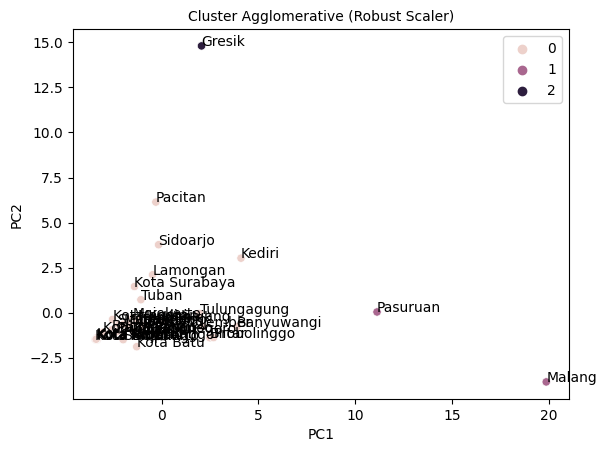

In [ ]:
# Scatterplot
ax = sns.scatterplot(x=temp[:,0],y=temp[:,1],hue=model_ag_rs_pca.labels_)
[plt.text(x=temp[i,0],y=temp[i,1],s=umkm_total.iloc[i,0]) for i in range(0,umkm_total.shape[0])]
ax.set_title('Cluster Agglomerative (Robust Scaler)',size=10)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()

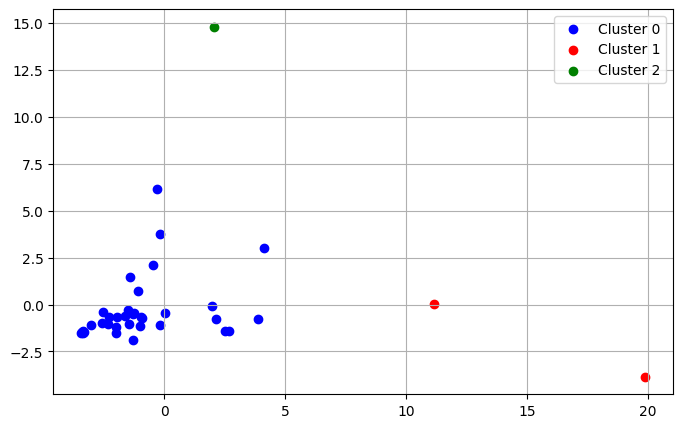

In [ ]:
plt.figure(figsize=(8,5))

plt.scatter(temp[model_ag_rs_pca.labels_ == 0, 0], temp[model_ag_rs_pca.labels_ == 0, 1],
            c='blue', label='Cluster 0')

plt.scatter(temp[model_ag_rs_pca.labels_ == 1, 0], temp[model_ag_rs_pca.labels_ == 1, 1],
            c='red', label='Cluster 1')

plt.scatter(temp[model_ag_rs_pca.labels_ == 2, 0], temp[model_ag_rs_pca.labels_ == 2, 1],
            c='green', label='Cluster 2')

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

# Dataset Post Processing

## Labeling Cluster

In [ ]:
clustered = umkm_total.drop(columns=umkm_total.iloc[:, 5:-1])
clustered['Labels'] = model_ag_rs_pca.labels_
clustered

,nama_kabupaten_kota,pertanian_kehutanan_perikanan,industri_pengolahan,akomodasi_makan_minum,PDRB_ADHB,hasil bumi,Labels
0,Pacitan,134543,28836,6970,6662.8,752220.3,0
1,Ponorogo,185737,20241,15167,8664.2,1033554.4,0
2,Trenggalek,152485,31574,7799,9697.8,571190.6,0
3,Tulungagung,154575,40584,19062,19481.6,1421593.1,0
4,Blitar,231704,28126,17223,19370.1,1481898.2,0
...,...,...,...,...,...,...,...
33,Kota Pasuruan,4137,5085,6124,2603.1,34971.5,0
34,Kota Mojokerto,2102,2028,4492,1455.3,21194.9,0
35,Kota Madiun,3389,3319,8131,3021.1,27852.4,0
36,Kota Surabaya,10521,28099,112363,229262.4,201208.1,0


In [ ]:
umkm_clus = umkm.copy()
umkm_clus['hasil bumi'] = umkm_clus.iloc[:, 4:-1].sum(axis=1)
umkm_clus['Labels'] = model_ag_rs_pca.labels_
umkm_clus = umkm_clus.round(decimals=1)
umkm_clus

,nama_kabupaten_kota,pertanian_kehutanan_perikanan,industri_pengolahan,...,PDRB_ADHB,hasil bumi,Labels
0,Pacitan,134543,28836,...,6662.8,752220.2,0
1,Ponorogo,185737,20241,...,8664.2,1033554.3,0
2,Trenggalek,152485,31574,...,9697.8,571190.6,0
3,Tulungagung,154575,40584,...,19481.6,1421593.2,0
4,Blitar,231704,28126,...,19370.1,1481898.2,0
...,...,...,...,...,...,...,...
33,Kota Pasuruan,4137,5085,...,2603.1,34971.5,0
34,Kota Mojokerto,2102,2028,...,1455.3,21195.0,0
35,Kota Madiun,3389,3319,...,3021.1,27852.4,0
36,Kota Surabaya,10521,28099,...,229262.4,201208.2,0


## Cluster Analysis

### Cluster Distribution

In [ ]:
clustered['Labels'].value_counts()

0    35
1     2
2     1
Name: Labels, dtype: int64

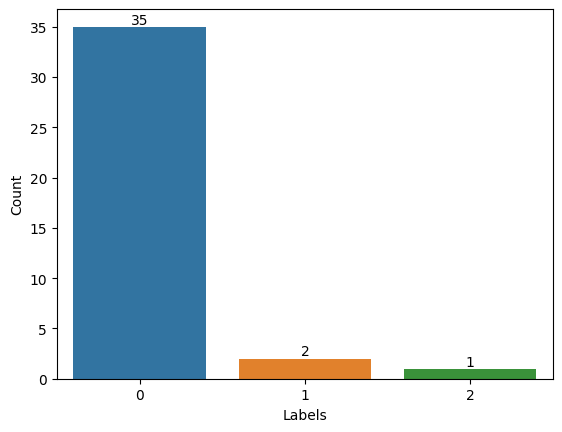

In [ ]:
# Mendapatkan urutan label yang unik
label_order = [0, 1, 2]

# Membuat countplot dengan urutan label yang sesuai
sns.countplot(x=clustered['Labels'], order=label_order)

# Menambahkan nilai pada diagram dengan posisi teks yang berbeda
for i, count in enumerate(clustered['Labels'].value_counts().sort_index()):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Memberikan label pada sumbu x dan y
plt.xlabel('Labels')
plt.ylabel('Count')

# Menampilkan diagram
plt.show()

### Mean Per-Cluster

In [ ]:
a = clustered[['Labels', 'nama_kabupaten_kota']]
dist = a.groupby(['Labels', 'nama_kabupaten_kota'])[['nama_kabupaten_kota']].count()
dist

nama_kabupaten_kota
Labels nama_kabupaten_kota                     
0      Bangkalan                              1
       Banyuwangi                             1
       Blitar                                 1
       Bojonegoro                             1
       Bondowoso                              1
...                                         ...
       Tuban                                  1
       Tulungagung                            1
1      Malang                                 1
       Pasuruan                               1
2      Gresik                                 1

[38 rows x 1 columns]

In [ ]:
# Cek mean masing-masing label
temp=clustered.groupby(by='Labels').mean()
temp['Percentage']=temp['hasil bumi']/sum(temp['hasil bumi'])*100
temp

<ipython-input-92-c581cc0732bd>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp=clustered.groupby(by='Labels').mean()


,pertanian_kehutanan_perikanan,industri_pengolahan,akomodasi_makan_minum,PDRB_ADHB,hasil bumi,Percentage
Labels,,,,,,
0,129860.2,21867.8,20359.714286,29104.348571,859039.46,12.814079
1,261996.0,33306.5,36711.000000,90212.800000,4265094.00,63.621350
2,94880.0,21988.0,33471.000000,94292.600000,1579738.70,23.564571


### Persentase Hasil Bumi Per-Cluster

Text(0.5, 1.0, 'Persentase Hasil Bumi Setiap Kluster')

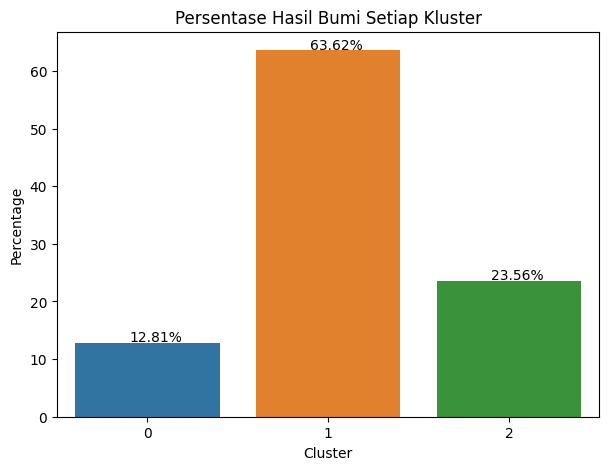

In [ ]:
# Persentase hasil bumi tiap cluster

plt.figure(figsize=(7, 5))
sns.barplot(data=temp,x=temp.index,y=temp['Percentage'])
[plt.text(x=temp.index[i]-0.1,y=temp.iloc[i,5]+0.2,s=str((temp.iloc[i,5]).round(decimals=2))+'%') for i in range(0,3)]
plt.xlabel('Cluster')
plt.title('Persentase Hasil Bumi Setiap Kluster')

### Persentase Jumlah UMKM Per-Cluster

In [ ]:
# Data prep
temp['Percentage_pertanian_kehutanan_perikanan']=temp.iloc[:,0:1].apply(lambda x:x/sum(x)*100)
temp['Percentage_industri_pengolahan']=temp.iloc[:,1:2].apply(lambda x:x/sum(x)*100)
temp['Percentage_akomodasi_makan_minum']=temp.iloc[:,2:3].apply(lambda x:x/sum(x)*100)

In [ ]:
table_percentage = temp.copy()
table_percentage['Percentage Hasil Bumi'] = table_percentage['hasil bumi']/sum(table_percentage['hasil bumi'])*100
table_percentagelabel = table_percentage.reset_index()
table_percentagelabel

,Labels,pertanian_kehutanan_perikanan,industri_pengolahan,...,Percentage_industri_pengolahan,Percentage_akomodasi_makan_minum,Percentage Hasil Bumi
0,0,129860.2,21867.8,...,28.340005,22.486557,12.814079
1,1,261996.0,33306.5,...,43.164214,40.545952,63.621350
2,2,94880.0,21988.0,...,28.495781,36.967491,23.564571


<Figure size 1000x600 with 0 Axes>

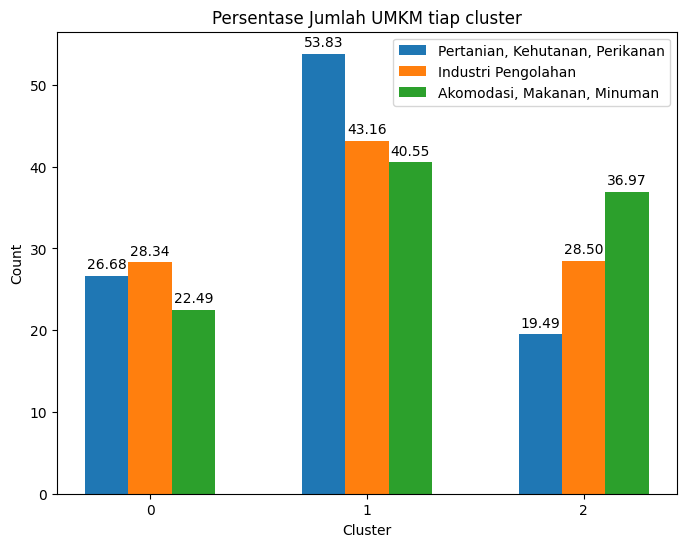

In [ ]:
# Jumlah umkm tiap cluster
plt.figure(figsize=(10,6))
fig, ax = plt.subplots(figsize=(8, 6))
pkp =ax.bar(temp.index-0.2,temp['Percentage_pertanian_kehutanan_perikanan'],0.2,label='Pertanian, Kehutanan, Perikanan')
ip =ax.bar(temp.index,temp['Percentage_industri_pengolahan'],0.2,label='Industri Pengolahan')
amm =ax.bar(temp.index+0.2,temp['Percentage_akomodasi_makan_minum'],0.2,label='Akomodasi, Makanan, Minuman')

# Menambahkan nilai pada diagram
for bar in pkp + ip + amm:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom')

plt.legend()
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Persentase Jumlah UMKM tiap cluster')

# Mengatur posisi dan label pada sumbu x
plt.xticks(temp.index - temp.index.min(), labels=temp.index)

plt.show()

### Persentase Nilai PDRB Per-Cluster

<ipython-input-99-3c355c0a0dc8>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = clustered.groupby(by='Labels').mean()


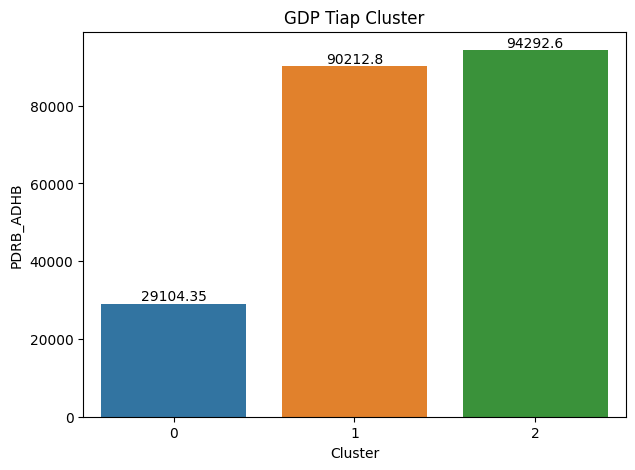

In [ ]:
# GDP tiap cluster

plt.figure(figsize=(7, 5))
temp = clustered.groupby(by='Labels').mean()
sns.barplot(x=temp.index, y=temp.loc[:, 'PDRB_ADHB'])

for i in range(0, len(temp)):
    plt.text(x=temp.index[i], y=temp.loc[i, 'PDRB_ADHB'], s=str(temp.loc[i, 'PDRB_ADHB'].round(decimals=2)),
             ha='center', va='bottom')

plt.title('GDP Tiap Cluster')
plt.xlabel('Cluster')
plt.show()

# Dashboard Preparation

## Add Columns Longitude Latitude

In [ ]:
# Membuat dataset longitude dan latitude

from geopy.geocoders import Nominatim
geolocator = Nominatim(timeout=3, user_agent="skripsi-clusering")
a = list(clustered['nama_kabupaten_kota'])
x=[]
for i in a:
    location = geolocator.geocode(i)
    x.append([i,location.latitude,location.longitude])

    location = pd.DataFrame(columns=['nama_kabupaten_kota','latitude', 'longitude'],
                     data=x)

In [ ]:
location

,nama_kabupaten_kota,latitude,longitude
0,Pacitan,-8.101718,111.144671
1,Ponorogo,-7.971227,111.498893
2,Trenggalek,-8.135935,111.640198
3,Tulungagung,-8.072904,111.899641
4,Blitar,-8.098244,112.165077
...,...,...,...
33,Kota Pasuruan,-7.628418,112.917705
34,Kota Mojokerto,-7.463154,112.431985
35,Kota Madiun,-7.548530,111.655698
36,Kota Surabaya,-5.394845,105.263543


In [ ]:
clustered = pd.merge(clustered,location, on ='nama_kabupaten_kota')
clustered

,nama_kabupaten_kota,pertanian_kehutanan_perikanan,industri_pengolahan,...,Labels,latitude,longitude
0,Pacitan,134543,28836,...,0,-8.101718,111.144671
1,Ponorogo,185737,20241,...,0,-7.971227,111.498893
2,Trenggalek,152485,31574,...,0,-8.135935,111.640198
3,Tulungagung,154575,40584,...,0,-8.072904,111.899641
4,Blitar,231704,28126,...,0,-8.098244,112.165077
...,...,...,...,...,...,...,...
33,Kota Pasuruan,4137,5085,...,0,-7.628418,112.917705
34,Kota Mojokerto,2102,2028,...,0,-7.463154,112.431985
35,Kota Madiun,3389,3319,...,0,-7.548530,111.655698
36,Kota Surabaya,10521,28099,...,0,-5.394845,105.263543


In [ ]:
umkm_clus = pd.merge(umkm_clus,location, on ='nama_kabupaten_kota')
umkm_clus

,nama_kabupaten_kota,pertanian_kehutanan_perikanan,industri_pengolahan,...,Labels,latitude,longitude
0,Pacitan,134543,28836,...,0,-8.101718,111.144671
1,Ponorogo,185737,20241,...,0,-7.971227,111.498893
2,Trenggalek,152485,31574,...,0,-8.135935,111.640198
3,Tulungagung,154575,40584,...,0,-8.072904,111.899641
4,Blitar,231704,28126,...,0,-8.098244,112.165077
...,...,...,...,...,...,...,...
33,Kota Pasuruan,4137,5085,...,0,-7.628418,112.917705
34,Kota Mojokerto,2102,2028,...,0,-7.463154,112.431985
35,Kota Madiun,3389,3319,...,0,-7.548530,111.655698
36,Kota Surabaya,10521,28099,...,0,-5.394845,105.263543


In [ ]:
umkm_recap = pd.merge(umkm_total,location, on ='nama_kabupaten_kota')
umkm_recap['labels'] = model_ag_rs_pca.labels_
umkm_recap

,nama_kabupaten_kota,pertanian_kehutanan_perikanan,industri_pengolahan,...,latitude,longitude,labels
0,Pacitan,134543,28836,...,-8.101718,111.144671,0
1,Ponorogo,185737,20241,...,-7.971227,111.498893,0
2,Trenggalek,152485,31574,...,-8.135935,111.640198,0
3,Tulungagung,154575,40584,...,-8.072904,111.899641,0
4,Blitar,231704,28126,...,-8.098244,112.165077,0
...,...,...,...,...,...,...,...
33,Kota Pasuruan,4137,5085,...,-7.628418,112.917705,0
34,Kota Mojokerto,2102,2028,...,-7.463154,112.431985,0
35,Kota Madiun,3389,3319,...,-7.548530,111.655698,0
36,Kota Surabaya,10521,28099,...,-5.394845,105.263543,0


In [ ]:
# umkm_clus.to_csv('/content/drive/MyDrive/SKRIPSI CLUST UMKM/Skripsi/Hasil Modeling/umkm_detail.csv', index=False)
# umkm_recap.to_csv('/content/drive/MyDrive/SKRIPSI CLUST UMKM/Skripsi/Hasil Modeling/umkm_recaplabel.csv', index=False)